In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [1]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
The authenticity of host 'github.com (140.82.113.4)' can't be established.
ED25519 key fingerprint is: SHA256:+DiY3wvvV6TuJJhbpZisF/zLDA0zPMSvHdkr4UvCOqU
This key is not known by any other names.
Are you sure you want to continue connecting (yes/no/[fingerprint])? ^C


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

2025-11-16 08:44:34.507512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from tensorflow.keras.preprocessing.image import load_img

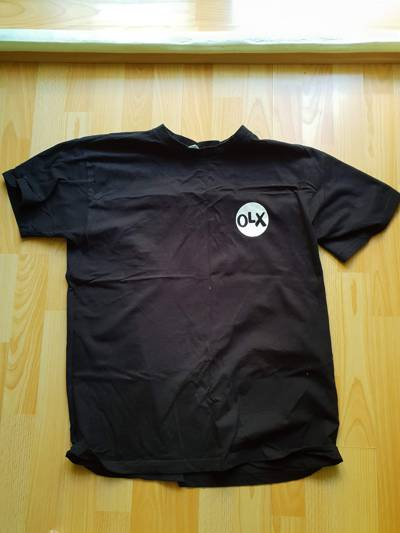

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1763304289.087188     880 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 997 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:09:00.0, compute capability: 8.6


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [24]:
X = preprocess_input(X)

In [27]:
pred = model.predict(X)

In [31]:
decode_predictions(pred)

40960/35363 [==================================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.039600316),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884117),
  ('n04525038', 'velvet', 0.0018057569)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [15]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [16]:
X, y = next(train_ds)

In [17]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [18]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [19]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [21]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2025-11-16 08:46:05.436608: I external/local_xla/xla/service/service.cc:163] XLA service 0x7efb9c0368f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-16 08:46:05.436622: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-11-16 08:46:05.510061: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-16 08:46:06.110238: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-11-16 08:46:09.847252: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:09.961159: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: 

 1/96 ━━━━━━━━━━━━━━━━━━━━ 17:09 11s/step - accuracy: 0.0625 - loss: 2.6060

2025-11-16 08:46:18.031453: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:18.144932: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:18.700066: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:18.808873: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:18.917401: E external/local_xla/xla/stream_

95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5929 - loss: 1.4955

2025-11-16 08:46:31.866395: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:31.978888: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:32.092366: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:32.636914: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 08:46:32.744748: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 233ms/step - accuracy: 0.6734 - loss: 1.2085 - val_accuracy: 0.7859 - val_loss: 0.8799
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8165 - loss: 0.5893 - val_accuracy: 0.8094 - val_loss: 0.7428
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8677 - loss: 0.3813 - val_accuracy: 0.7625 - val_loss: 0.9735
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9025 - loss: 0.2726 - val_accuracy: 0.8006 - val_loss: 0.8986
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9498 - loss: 0.1380 - val_accuracy: 0.8182 - val_loss: 0.8557
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9811 - loss: 0.0694 - val_accuracy: 0.7977 - val_loss: 0.9039
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9840 - loss: 0.0577 - val_accuracy: 0.7947 - val_loss: 0.9650
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9746 - loss: 0.0825 - val_accuracy: 0.7713 - val_loss: 

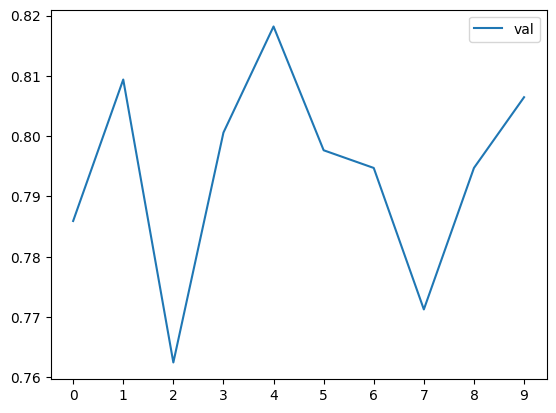

In [22]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [23]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [24]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.3654 - loss: 1.9480 - val_accuracy: 0.5455 - val_loss: 1.5963
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5512 - loss: 1.4126 - val_accuracy: 0.6305 - val_loss: 1.2498
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6366 - loss: 1.1608 - val_accuracy: 0.7009 - val_loss: 1.0587
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6763 - loss: 1.0134 - val_accuracy: 0.7126 - val_loss: 0.9485
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7060 - loss: 0.9151 - val_accuracy: 0.7126 - val_loss: 0.8747
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7272 - loss: 0.8460 - val_accuracy: 0.7419 - val_loss: 0.8176
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7454 - loss: 0.7925 - val_accuracy: 0.7419 - val_loss: 0.7802
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7588 - loss: 0.7492 - val_accuracy: 0

In [25]:
del scores[0.1]
del scores[0.0001]

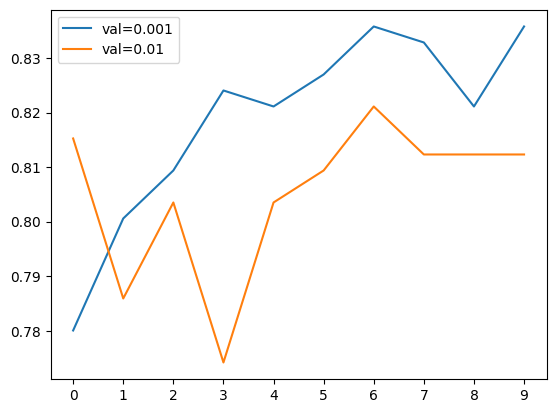

In [26]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [27]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [31]:
model.save_weights('model_v1.weights.h5') #model.save_weights('model_v1.h5', save_format='h5')

In [34]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.weights.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [35]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5138 - loss: 1.4466

96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.6356 - loss: 1.0801 - val_accuracy: 0.7449 - val_loss: 0.7375
Epoch 2/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7875 - loss: 0.6232

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7898 - loss: 0.6255 - val_accuracy: 0.7947 - val_loss: 0.6506
Epoch 3/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8440 - loss: 0.4981

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8325 - loss: 0.5098 - val_accuracy: 0.8182 - val_loss: 0.5739
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8550 - loss: 0.4327 - val_accuracy: 0.7977 - val_loss: 0.5829
Epoch 5/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8866 - loss: 0.3640

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8885 - loss: 0.3692 - val_accuracy: 0.8299 - val_loss: 0.5387
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9051 - loss: 0.3285 - val_accuracy: 0.8094 - val_loss: 0.5494
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9234 - loss: 0.2876 - val_accuracy: 0.8211 - val_loss: 0.5290
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9296 - loss: 0.2610 - val_accuracy: 0.8006 - val_loss: 0.5468
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9404 - loss: 0.2353 - val_accuracy: 0.8211 - val_loss: 0.5256
Epoch 10/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9554 - loss: 0.2017

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9550 - loss: 0.2085 - val_accuracy: 0.8328 - val_loss: 0.5244


## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [36]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - accuracy: 0.4560 - loss: 1.6144 - val_accuracy: 0.6745 - val_loss: 1.1675
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6897 - loss: 0.9726 - val_accuracy: 0.7214 - val_loss: 0.8959
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7370 - loss: 0.7790 - val_accuracy: 0.7625 - val_loss: 0.7811
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7849 - loss: 0.6697 - val_accuracy: 0.7654 - val_loss: 0.7382
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8093 - loss: 0.5799 - val_accuracy: 0.7771 - val_loss: 0.6883
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8393 - loss: 0.5143 - val_accuracy: 0.7742 - val_loss: 0.6752
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8582 - loss: 0.4580 - val_accuracy: 0.7830 - val_loss: 0.6516
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8771 - loss: 0.4085 - val_accuracy: 0.788

2025-11-16 09:20:52.445027: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-16 09:20:53.246755: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads

2025-11-16 09:21:04.744671: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 263.29MiB (rounded to 276081408)requested by op 
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-11-16 09:21:04.744718: I externa

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 758, in start

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/utils.py", line 71, in preserve_context

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 614, in shell_main

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 366, in execute_request

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 827, in execute_request

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 458, in do_execute

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 663, in run_cell

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_880/1461918777.py", line 9, in <module>

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 399, in fit

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 241, in function

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in multi_step_on_iterator

  File "/home/paradx/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 125, in wrapper

Out of memory while trying to allocate 276081288 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_111645]

In [1]:
# 1. 显存管理和清理
import gc
import tensorflow as tf

# 2. 数据处理和可视化
import numpy as np
import matplotlib.pyplot as plt

# 3. Keras 核心
from tensorflow import keras

# 4. 图像处理
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 5. 预训练模型
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

2025-11-16 09:27:59.815219: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# ===== Cell 1: GPU 配置（必须第一个运行）=====
import gc
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ GPU memory growth enabled for {len(gpus)} GPU(s)")
    except RuntimeError as e:
        print(f"⚠️ {e}")

✅ GPU memory growth enabled for 1 GPU(s)


In [3]:
# ===== Cell 2: 导入所有需要的包 =====
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions

print("✅ All packages imported")

✅ All packages imported


In [4]:
# ===== Cell 3: 创建数据生成器（你之前的代码）=====
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

print("✅ Datasets ready")

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
✅ Datasets ready


In [5]:
# ===== Cell 4: 定义模型函数 =====
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False
    
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

print("✅ Model function defined")

✅ Model function defined


In [6]:
# ===== Cell 5: 训练循环 =====
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(f"\n{'='*50}")
    print(f"Training model with inner layer size: {size}")
    print(f"{'='*50}\n")
    
    # 清理显存
    tf.keras.backend.clear_session()
    gc.collect()
    
    # 训练
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    # 立即清理
    del model

print("\n✅ All models trained successfully!")


Training model with inner layer size: 10



I0000 00:00:1763306923.457269    6781 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21484 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:09:00.0, compute capability: 8.6


Epoch 1/10


2025-11-16 09:28:46.906309: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fc6140387c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-16 09:28:46.906326: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-11-16 09:28:46.983058: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-16 09:28:47.593677: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-11-16 09:28:51.112872: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:28:51.226864: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: 

46/96 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3204 - loss: 2.0257

2025-11-16 09:29:00.496676: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:00.609879: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:01.162271: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:01.270787: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:01.378766: E external/local_xla/xla/stream_

95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4040 - loss: 1.8288

2025-11-16 09:29:12.821598: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:12.935398: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:13.048306: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:13.548923: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 09:29:13.657299: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 228ms/step - accuracy: 0.5114 - loss: 1.5464 - val_accuracy: 0.6188 - val_loss: 1.2369
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6216 - loss: 1.1169 - val_accuracy: 0.6481 - val_loss: 1.0709
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6545 - loss: 0.9701 - val_accuracy: 0.6364 - val_loss: 1.0063
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6829 - loss: 0.8624 - val_accuracy: 0.6686 - val_loss: 0.9207
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7259 - loss: 0.7547 - val_accuracy: 0.7009 - val_loss: 0.8743
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7699 - loss: 0.6597 - val_accuracy: 0.7625 - val_loss: 0.7704
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8132 - loss: 0.5752 - val_accuracy: 0.7537 - val_loss: 0.7587
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8439 - loss: 0.5106 - val_accuracy: 0.7566 - val_loss: 

2025-11-16 09:29:50.739577: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-16 09:29:51.489336: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - accuracy: 0.6692 - loss: 0.9586 - val_accuracy: 0.7859 - val_loss: 0.6768
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8279 - loss: 0.4919 - val_accuracy: 0.8094 - val_loss: 0.5573
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8849 - loss: 0.3422 - val_accuracy: 0.8152 - val_loss: 0.5702
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9296 - loss: 0.2314 - val_accuracy: 0.8006 - val_loss: 0.5975
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9602 - loss: 0.1624 - val_accuracy: 0.8182 - val_loss: 0.5564
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9765 - loss: 0.1147 - val_accuracy: 0.7889 - val_loss: 0.6810
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9866 - loss: 0.0772 - val_accuracy: 0.8123 - val_loss: 0.6321
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9961 - loss: 0.0485 - val_accuracy: 0.8211 - val_loss: 

2025-11-16 09:30:39.069896: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-16 09:30:39.609749: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 24 bytes spill stores, 24 bytes spill loads

2025-11-16 09:30:40.114666: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



48/96 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5357 - loss: 1.4782

2025-11-16 09:30:45.368366: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 56 bytes spill stores, 56 bytes spill loads

2025-11-16 09:30:45.421972: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 4 bytes spill stores, 4 bytes spill loads

2025-11-16 09:30:45.456422: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 32 bytes spill stores, 32 bytes spill loads

2025-11-16 09:30:45.473851: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 32 bytes spill stores, 32 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5957 - loss: 1.2573

2025-11-16 09:30:53.251246: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 4 bytes spill stores, 4 bytes spill loads

2025-11-16 09:30:53.356262: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1086', 56 bytes spill stores, 56 bytes spill loads

2025-11-16 09:30:53.408195: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 32 bytes spill stores, 32 bytes spill loads

2025-11-16 09:30:53.497359: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 32 bytes spill stores, 32 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - accuracy: 0.6776 - loss: 0.9566 - val_accuracy: 0.7947 - val_loss: 0.6526
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8481 - loss: 0.4418 - val_accuracy: 0.7977 - val_loss: 0.6047
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9097 - loss: 0.2631 - val_accuracy: 0.8065 - val_loss: 0.5998
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9452 - loss: 0.1633 - val_accuracy: 0.8299 - val_loss: 0.5895
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9775 - loss: 0.0876 - val_accuracy: 0.8182 - val_loss: 0.6149
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9928 - loss: 0.0404 - val_accuracy: 0.8416 - val_loss: 0.5935
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9980 - loss: 0.0225 - val_accuracy: 0.8387 - val_loss: 0.6469
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9977 - loss: 0.0186 - val_accuracy: 0.8123 - val_loss: 

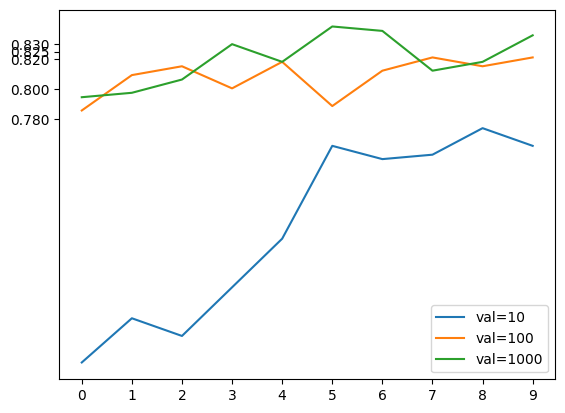

In [8]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [9]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [10]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    tf.keras.backend.clear_session()
    gc.collect()

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()
    
    del model

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.6584 - loss: 0.9718 - val_accuracy: 0.7771 - val_loss: 0.6845
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8178 - loss: 0.5289 - val_accuracy: 0.7713 - val_loss: 0.6308
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8758 - loss: 0.3741 - val_accuracy: 0.7889 - val_loss: 0.5794
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9113 - loss: 0.2797 - val_accuracy: 0.8152 - val_loss: 0.5737
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9462 - loss: 0.1982 - val_accuracy: 0.8152 - val_loss: 0.5926
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9648 - loss: 0.1400 - val_accuracy: 0.8152 - val_loss: 0.5737
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9769 - loss: 0.1056 - val_accuracy: 0.8035 - val_loss: 0.5945
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9902 - loss: 0.0732 - val_accuracy: 0.82

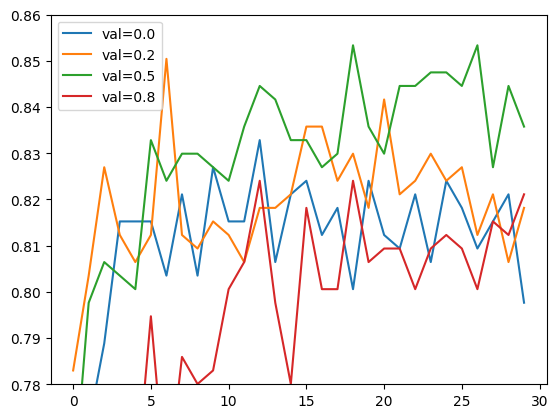

In [11]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

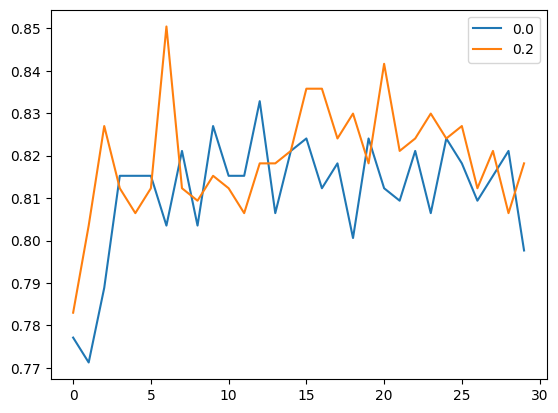

In [12]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [19]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [20]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - accuracy: 0.6535 - loss: 1.0302 - val_accuracy: 0.7801 - val_loss: 0.6752
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7862 - loss: 0.6120 - val_accuracy: 0.7977 - val_loss: 0.5836
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8429 - loss: 0.4512 - val_accuracy: 0.8123 - val_loss: 0.5553
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8752 - loss: 0.3577 - val_accuracy: 0.8065 - val_loss: 0.5666
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9042 - loss: 0.2860 - val_accuracy: 0.8358 - val_loss: 0.5282
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9312 - loss: 0.2249 - val_accuracy: 0.8299 - val_loss: 0.5466
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9436 - loss: 0.1828 - val_accuracy: 0.8358 - val_loss: 0.5529
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9609 - loss: 0.1460 - val_accuracy: 0.8182 -

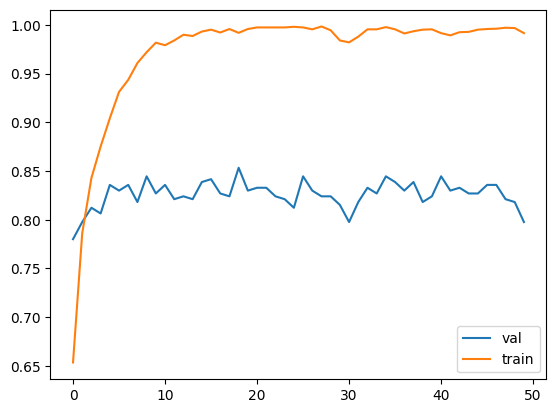

In [21]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [22]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [23]:
input_size = 299

In [24]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [25]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [27]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2025-11-16 12:17:53.905877: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:17:54.052993: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:17:54.205088: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:17:55.587209: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:17:55.724219: E external/local_xla/xla/stream_

56/96 ━━━━━━━━━━━━━━━━━━━━ 13s 341ms/step - accuracy: 0.5370 - loss: 1.5817

2025-11-16 12:18:27.520863: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:18:27.662286: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:18:28.831716: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:18:28.964428: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:18:29.721399: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.5949 - loss: 1.3745

2025-11-16 12:19:04.893308: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:19:05.026331: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:19:06.105127: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:19:06.235047: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:19:06.361080: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 88s 740ms/step - accuracy: 0.6965 - loss: 0.9920 - val_accuracy: 0.7918 - val_loss: 0.6011
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8079 - loss: 0.5491

96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 401ms/step - accuracy: 0.8214 - loss: 0.5178 - val_accuracy: 0.8534 - val_loss: 0.4706
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 394ms/step - accuracy: 0.8514 - loss: 0.4347 - val_accuracy: 0.8446 - val_loss: 0.4271
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 403ms/step - accuracy: 0.8638 - loss: 0.3893 - val_accuracy: 0.8504 - val_loss: 0.4442
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 396ms/step - accuracy: 0.8752 - loss: 0.3468 - val_accuracy: 0.8475 - val_loss: 0.4232
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.8827 - loss: 0.3401

96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 396ms/step - accuracy: 0.8921 - loss: 0.3212 - val_accuracy: 0.8680 - val_loss: 0.4015
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.8934 - loss: 0.3127

96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 405ms/step - accuracy: 0.8944 - loss: 0.3058 - val_accuracy: 0.8739 - val_loss: 0.3637
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.9114 - loss: 0.2533

96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.9038 - loss: 0.2721 - val_accuracy: 0.8886 - val_loss: 0.3436
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 395ms/step - accuracy: 0.9078 - loss: 0.2613 - val_accuracy: 0.8768 - val_loss: 0.3681
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 398ms/step - accuracy: 0.9214 - loss: 0.2352 - val_accuracy: 0.8710 - val_loss: 0.3843
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 394ms/step - accuracy: 0.9228 - loss: 0.2232 - val_accuracy: 0.8768 - val_loss: 0.3769
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 401ms/step - accuracy: 0.9247 - loss: 0.2157 - val_accuracy: 0.8886 - val_loss: 0.3517
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.9332 - loss: 0.2018 - val_accuracy: 0.8827 - val_loss: 0.3869
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 406ms/step - accuracy: 0.9400 - loss: 0.1917 - val_accuracy: 0.8827 - val_loss: 0.3645
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 394ms/step - accuracy: 0.9394 - loss: 0.1744 - val_accuracy:

96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 411ms/step - accuracy: 0.9521 - loss: 0.1394 - val_accuracy: 0.8915 - val_loss: 0.3596
Epoch 21/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 392ms/step - accuracy: 0.9537 - loss: 0.1410 - val_accuracy: 0.8827 - val_loss: 0.3636
Epoch 22/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 400ms/step - accuracy: 0.9566 - loss: 0.1261 - val_accuracy: 0.8534 - val_loss: 0.3935
Epoch 23/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 396ms/step - accuracy: 0.9583 - loss: 0.1245 - val_accuracy: 0.8739 - val_loss: 0.3865
Epoch 24/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.9642 - loss: 0.1235

96/96 ━━━━━━━━━━━━━━━━━━━━ 38s 391ms/step - accuracy: 0.9576 - loss: 0.1299 - val_accuracy: 0.9032 - val_loss: 0.3439
Epoch 25/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 376ms/step - accuracy: 0.9645 - loss: 0.1133 - val_accuracy: 0.8710 - val_loss: 0.3813
Epoch 26/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 387ms/step - accuracy: 0.9593 - loss: 0.1206 - val_accuracy: 0.8856 - val_loss: 0.3745
Epoch 27/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 36s 373ms/step - accuracy: 0.9651 - loss: 0.1057 - val_accuracy: 0.8651 - val_loss: 0.4073
Epoch 28/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 388ms/step - accuracy: 0.9716 - loss: 0.0971 - val_accuracy: 0.8798 - val_loss: 0.3990
Epoch 29/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 383ms/step - accuracy: 0.9700 - loss: 0.0942 - val_accuracy: 0.8798 - val_loss: 0.3967
Epoch 30/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 385ms/step - accuracy: 0.9716 - loss: 0.0953 - val_accuracy: 0.8886 - val_loss: 0.3681
Epoch 31/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.9729 - loss: 0.0852 - val_accuracy

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [30]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [32]:
model = keras.models.load_model('xception_v4_1_24_0.903.h5')

In [33]:
model.evaluate(test_ds)

10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8689 - loss: 0.3655

2025-11-16 12:59:39.423779: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:59:39.556014: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:59:40.626667: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:59:40.754699: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 12:59:41.400523: E external/local_xla/xla/stream_

12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9086 - loss: 0.2566


[0.2566351294517517, 0.9086021780967712]

In [34]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [35]:
img = load_img(path, target_size=(299, 299))

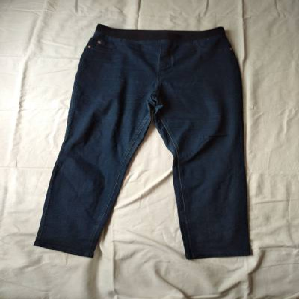

In [42]:
load_img(path, target_size=(299,299))

In [36]:
import numpy as np

In [37]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [38]:
X = preprocess_input(X)

In [39]:
pred = model.predict(X)

2025-11-16 13:02:24.561564: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 13:02:24.674053: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 13:02:24.785485: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 13:02:24.897523: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-11-16 13:02:25.010253: E external/local_xla/xla/stream_

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [40]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [41]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-5.119657),
 'hat': np.float32(-6.8298955),
 'longsleeve': np.float32(-2.4508836),
 'outwear': np.float32(-2.6272483),
 'pants': np.float32(9.694209),
 'shirt': np.float32(-3.8984416),
 'shoes': np.float32(-3.617355),
 'shorts': np.float32(2.7898219),
 'skirt': np.float32(-5.2779317),
 't-shirt': np.float32(-3.155381)}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

